# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [68]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [69]:
def GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type ):
    if Distance_Type == 'Eucledian':
        Cluster_Distance = np.sqrt(np.sum((Cluster_Centroids[:, np.newaxis] - Data_points) ** 2, axis=2))
    elif Distance_Type == 'Pearson':
        data_points_centered = Data_points - np.mean(Data_points, axis=0)
        cluster_centered = Cluster_Centroids - np.mean(Cluster_Centroids, axis=0)
        data_points_std = np.sqrt((data_points_centered**2).sum(axis=1))
        cluster_std = np.sqrt((cluster_centered**2).sum(axis=1))
        correlation_matrix = np.dot(data_points_centered, cluster_centered.T)
        correlation_matrix /= np.outer(data_points_std, cluster_std)
        Cluster_Distance = 1 - correlation_matrix
    else:
        raise ValueError('Distance type not recognized')
    return Cluster_Distance

> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [70]:
def GUC_Kmean (Data_points, Number_of_Clusters,  Distance_Type ):
    # Find data ranges for each column and generate random cluster heads
    data_ranges = np.array([(min(Data_points[:,i]), max(Data_points[:,i])) for i in range(Data_points.shape[1])])
    Cluster_Centroids = np.random.rand(Number_of_Clusters, Data_points.shape[1]) * (data_ranges[:,1] - data_ranges[:,0]) + data_ranges[:,0]
    
    # Loop until a stopping condition is reached
    old_Distortion = np.inf
    while True:
        # Cluster Assignment
        distances = GUC_Distance(Cluster_Centroids, Data_points, Distance_Type)
        cluster_labels = np.argmin(distances, axis=0)
        Distortion = np.mean(np.min(distances, axis=0)**2)

        # Stopping Condition
        if abs(old_Distortion - Distortion) < 1e-6:
            break
        old_Distortion = Distortion

        # Update Centroids
        for i in range(Number_of_Clusters):
            Cluster_Centroids[i] = np.mean(Data_points[cluster_labels == i], axis=0)

    Cluster_Distance = GUC_Distance(Cluster_Centroids, Data_points, Distance_Type)
    Cluster_Metric = np.sum(np.min(Cluster_Distance, axis=0)**2)
    return [Cluster_Distance, Cluster_Metric] 

## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [71]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [91]:
def GUC_Plotting(X, Y):
    plt.scatter(X[:,0], X[:,1], s=40, c=Y, cmap=plt.cm.Spectral)
    plt.show()

In [72]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

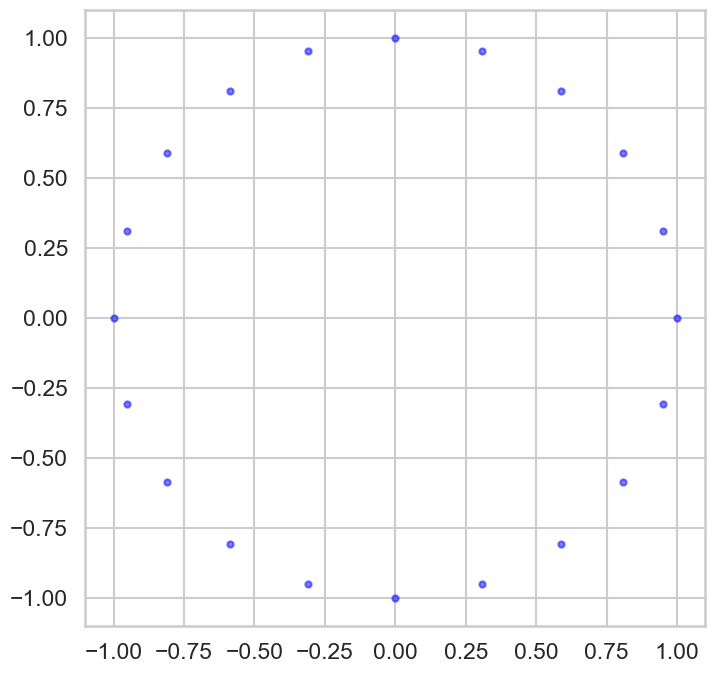

In [143]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X1 = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(X1)

In [144]:
df = X1
num_clusters = 2
distance_type = 'Eucledian'
result = GUC_Kmean(df, num_clusters, distance_type)
print("Cluster Distances:\n", result[0])
print("Cluster Metric:", result[1])

Cluster Distances:
 [[1.59617608 1.52074455 1.41033939 1.26831959 1.09937918 0.91006152
  0.71035567 0.5191253  0.38194801 0.38194801 0.5191253  0.71035567
  0.91006152 1.09937918 1.26831959 1.41033939 1.52074455 1.59617608
  1.63443718 1.63443718]
 [0.5191253  0.71035567 0.91006152 1.09937918 1.26831959 1.41033939
  1.52074455 1.59617608 1.63443718 1.63443718 1.59617608 1.52074455
  1.41033939 1.26831959 1.09937918 0.91006152 0.71035567 0.5191253
  0.38194801 0.38194801]]
Cluster Metric: 11.82730836218772


> #### 2.3. Example 2 : Multi blob Data Gen and display 

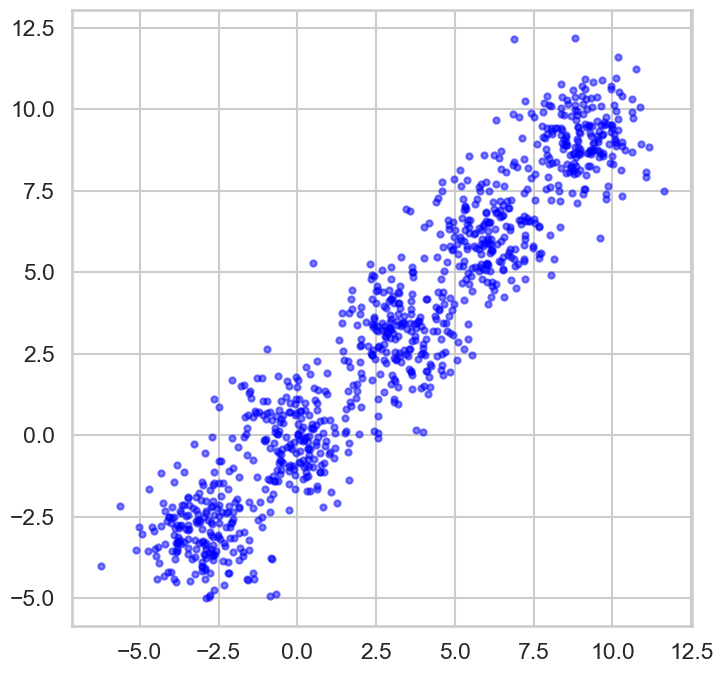

In [145]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X2, y2 = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X2)

In [147]:
df = X2
num_clusters = 2
distance_type = 'Eucledian'
result = GUC_Kmean(df, num_clusters, distance_type)
print("Cluster Distances:\n", result[0])
print("Cluster Metric:", result[1])

Cluster Distances:
 [[12.99548049 11.7196219  13.57112988 ...  4.75948787  3.15370119
   3.12056153]
 [ 2.36726995  1.21629003  2.90992007 ... 15.4055619  13.76250946
  13.75574305]]
Cluster Metric: 10354.018824821156


#### 2.3. Example 3 : moons Data Gen and display 

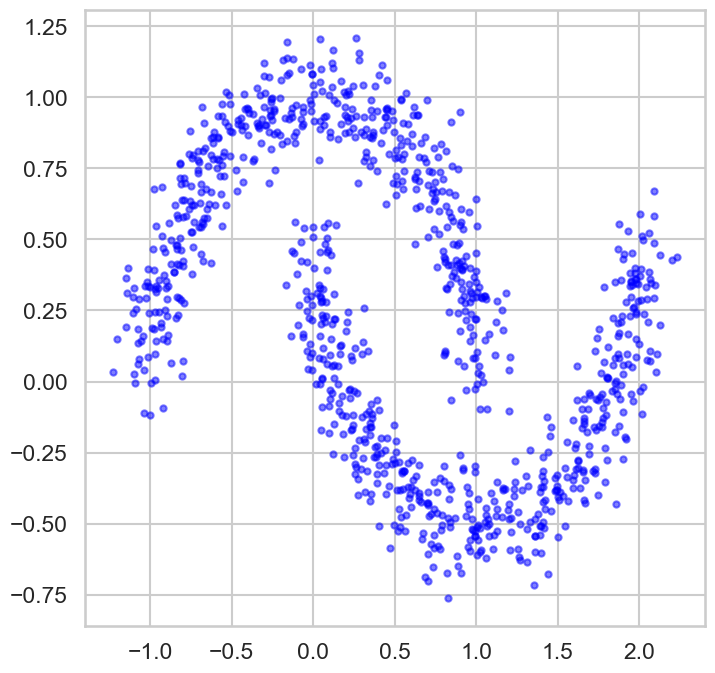

In [148]:
n_samples = 1000
X3, y3 = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X3)

In [149]:
df = X3
num_clusters = 2
distance_type = 'Eucledian'
result = GUC_Kmean(df, num_clusters, distance_type)
print("Cluster Distances:\n", result[0])
print("Cluster Metric:", result[1])

Cluster Distances:
 [[0.74559807 1.65229266 1.2101089  ... 1.78059371 0.58549714 0.35400513]
 [1.37563872 0.41571476 0.74076416 ... 0.3226895  2.12051777 1.58652757]]
Cluster Metric: 409.3975022385656


## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

Example 1

GUC_Kmean Example 1

In [153]:
df = X1
num_clusters = 2
distance_type = 'Eucledian'
result = GUC_Kmean(df, num_clusters, distance_type)
print("Cluster Distances:\n", result[0])
print("Cluster Metric:", result[1])

Cluster Distances:
 [[1.09937918 1.26831959 1.41033939 1.52074455 1.59617608 1.63443718
  1.63443718 1.59617608 1.52074455 1.41033939 1.26831959 1.09937918
  0.91006152 0.71035567 0.5191253  0.38194801 0.38194801 0.5191253
  0.71035567 0.91006152]
 [1.26831959 1.09937918 0.91006152 0.71035567 0.5191253  0.38194801
  0.38194801 0.5191253  0.71035567 0.91006152 1.09937918 1.26831959
  1.41033939 1.52074455 1.59617608 1.63443718 1.63443718 1.59617608
  1.52074455 1.41033939]]
Cluster Metric: 11.82730836218772


Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 


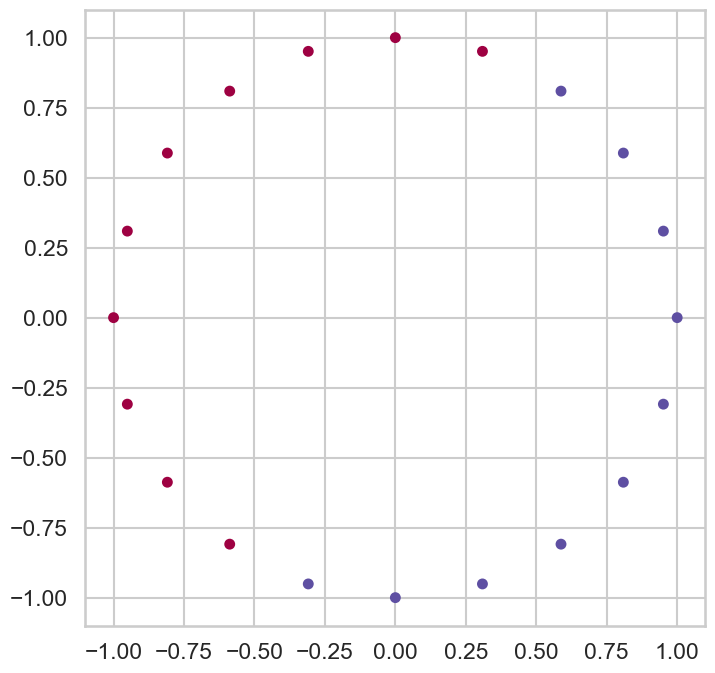

In [158]:
# Apply K-means on the data
k = 2
distance_type = 'Eucledian'
results = GUC_Kmean(X1, k, distance_type)

# Extract cluster distances and metric
distances = results[0]
metric = results[1]

# Display clusters
cluster_labels = np.argmin(distances, axis=0)
GUC_Plotting(X1, cluster_labels)

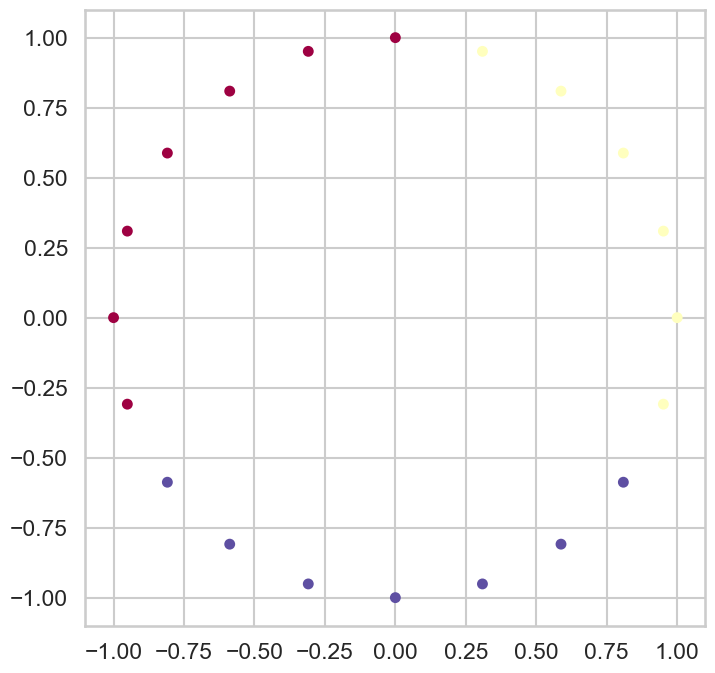

In [159]:
# Apply K-means on the data
k = 3
distance_type = 'Eucledian'
results = GUC_Kmean(X1, k, distance_type)

# Extract cluster distances and metric
distances = results[0]
metric = results[1]

# Display clusters
cluster_labels = np.argmin(distances, axis=0)
GUC_Plotting(X1, cluster_labels)

Example 2

GUC_kmean

In [160]:
df = X2
num_clusters = 2
distance_type = 'Eucledian'
result = GUC_Kmean(df, num_clusters, distance_type)
print("Cluster Distances:\n", result[0])
print("Cluster Metric:", result[1])

Cluster Distances:
 [[12.98608177 11.7099763  13.56162421 ...  4.76866725  3.16360367
   3.13039097]
 [ 2.35464731  1.20786294  2.89780152 ... 15.41780983 13.77446163
  13.76775458]]
Cluster Metric: 10353.8985790469


Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 


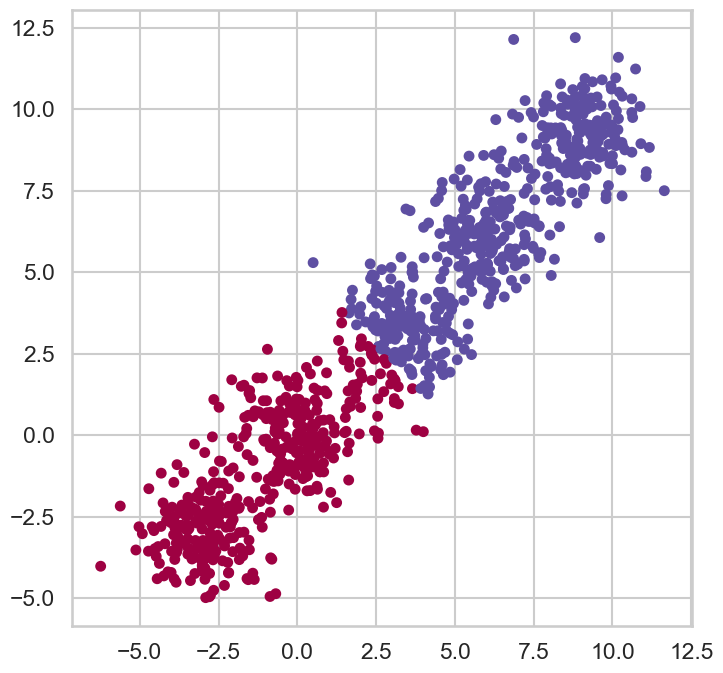

In [161]:
# Apply K-means on the data
k = 2
distance_type = 'Eucledian'
results = GUC_Kmean(X2, k, distance_type)

# Extract cluster distances and metric
distances = results[0]
metric = results[1]

# Display clusters
cluster_labels = np.argmin(distances, axis=0)
GUC_Plotting(X2, cluster_labels)

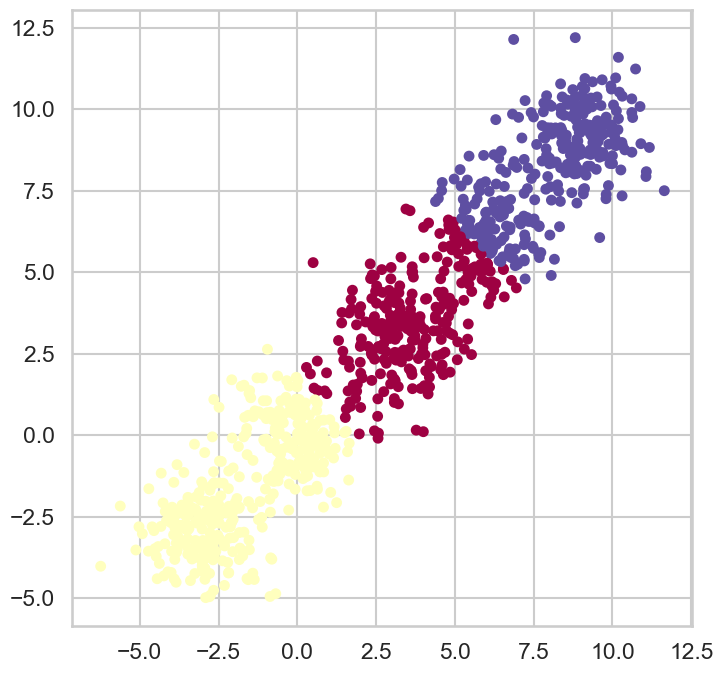

In [162]:
# Apply K-means on the data
k = 3
distance_type = 'Eucledian'
results = GUC_Kmean(X2, k, distance_type)

# Extract cluster distances and metric
distances = results[0]
metric = results[1]

# Display clusters
cluster_labels = np.argmin(distances, axis=0)
GUC_Plotting(X2, cluster_labels)

In [205]:
data = X2
num_clusters = 2
distance_type = 'Pearson'
result = GUC_Kmean(data.T, num_clusters, distance_type)

# Create a new boolean index with the same size as the new cluster_labels array
bool_index = np.zeros(len(data), dtype=bool)
for i in range(num_clusters):
    bool_index[cluster_labels == i] = True

# Use the new boolean index to get the data points for each cluster
cluster_data = []
for i in range(num_clusters):
    cluster_data.append(data[bool_index == i])

print("Cluster Distances:\n", result[0])
print("Cluster Metric:", result[1])

Cluster Distances:
 [[ 2.00000000e+00  0.00000000e+00]
 [-2.22044605e-16  2.00000000e+00]]
Cluster Metric: 4.930380657631324e-32


Example 3

GUC_kmeans

In [168]:
df = X3
num_clusters = 2
distance_type = 'Eucledian'
result = GUC_Kmean(df, num_clusters, distance_type)
print("Cluster Distances:\n", result[0])
print("Cluster Metric:", result[1])

Cluster Distances:
 [[1.37563872 0.41571476 0.74076416 ... 0.3226895  2.12051777 1.58652757]
 [0.74559807 1.65229266 1.2101089  ... 1.78059371 0.58549714 0.35400513]]
Cluster Metric: 409.3975022385656


Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 


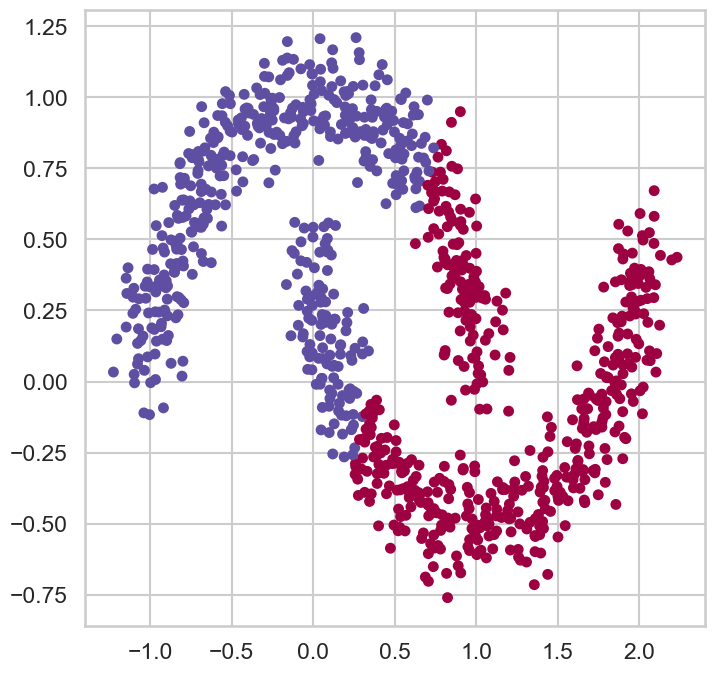

In [169]:
# Apply K-means on the data
k = 2
distance_type = 'Eucledian'
results = GUC_Kmean(X3, k, distance_type)

# Extract cluster distances and metric
distances = results[0]
metric = results[1]

# Display clusters
cluster_labels = np.argmin(distances, axis=0)
GUC_Plotting(X3, cluster_labels)

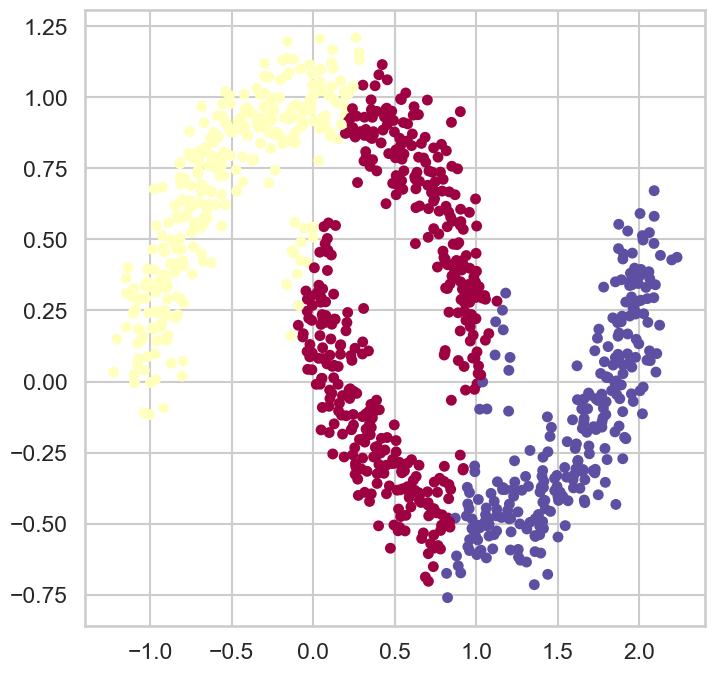

In [170]:
# Apply K-means on the data
k = 3
distance_type = 'Eucledian'
results = GUC_Kmean(X3, k, distance_type)

# Extract cluster distances and metric
distances = results[0]
metric = results[1]

# Display clusters
cluster_labels = np.argmin(distances, axis=0)
GUC_Plotting(X3, cluster_labels)

plot the Cluster Metric versus the number of clusters

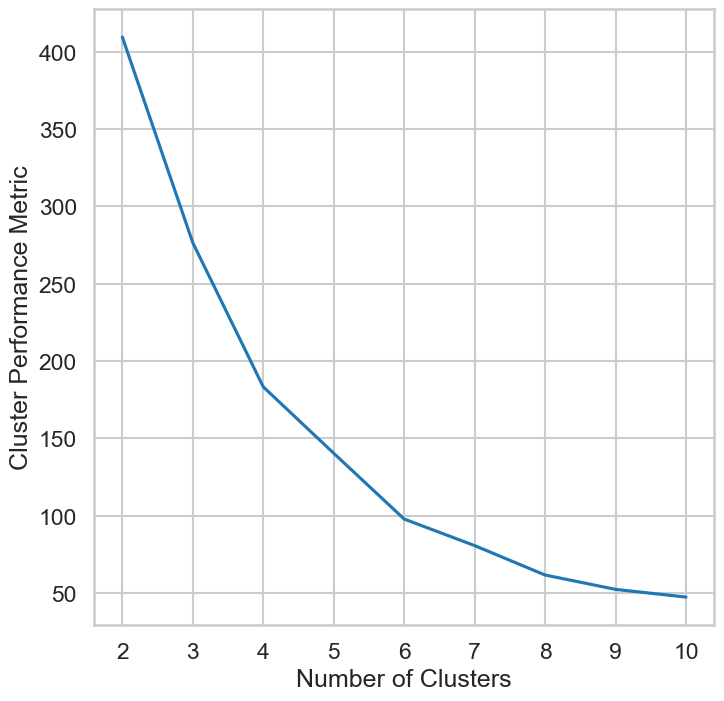

In [171]:
# Set the range of the number of clusters
min_clusters = 2
max_clusters = 10

# Initialize an empty list to store the metric values
metric_values = []

# Loop through the range of the number of clusters and calculate the metric for each cluster
for num_clusters in range(min_clusters, max_clusters+1):
    result = GUC_Kmean(X3, num_clusters, distance_type)
    metric_values.append(result[1])

# Plot the metric values against the number of clusters
plt.plot(range(min_clusters, max_clusters+1), metric_values)
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Performance Metric')
plt.show()

In [203]:
data = X3
num_clusters = 2
distance_type = 'Pearson'
result = GUC_Kmean(data.T, num_clusters, distance_type)

# Create a new boolean index with the same size as the new cluster_labels array
bool_index = np.zeros(len(data), dtype=bool)
for i in range(num_clusters):
    bool_index[cluster_labels == i] = True

# Use the new boolean index to get the data points for each cluster
cluster_data = []
for i in range(num_clusters):
    cluster_data.append(data[bool_index == i])

print("Cluster Distances:\n", result[0])
print("Cluster Metric:", result[1])

Cluster Distances:
 [[2.00000000e+00 1.11022302e-16]
 [1.11022302e-16 2.00000000e+00]]
Cluster Metric: 2.465190328815662e-32


## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [84]:
df = pd.read_csv("E://University/Semester 10/Machine Learning (NETW1013)/Assignments/Assignment 1/Customer data.csv", index_col=0)


In [85]:
data = df[['Age', 'Income', 'Settlement size']]
num_clusters = 2
distance_type = 'Eucledian'
result = GUC_Kmean(data.values, num_clusters, distance_type)
print("Cluster Distances:\n", result[0])
print("Cluster Metric:", result[1])

Cluster Distances:
 [[ 45239.91705219  19136.91960941  80699.91015944 ...  83509.91044319
   71941.91189838 101493.91111789]
 [ 20960.91516721  47063.89066244  14499.11867189 ...  17309.11115151
    5741.11959253  35293.11203335]]
Cluster Metric: 1214607963783.6838


Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 

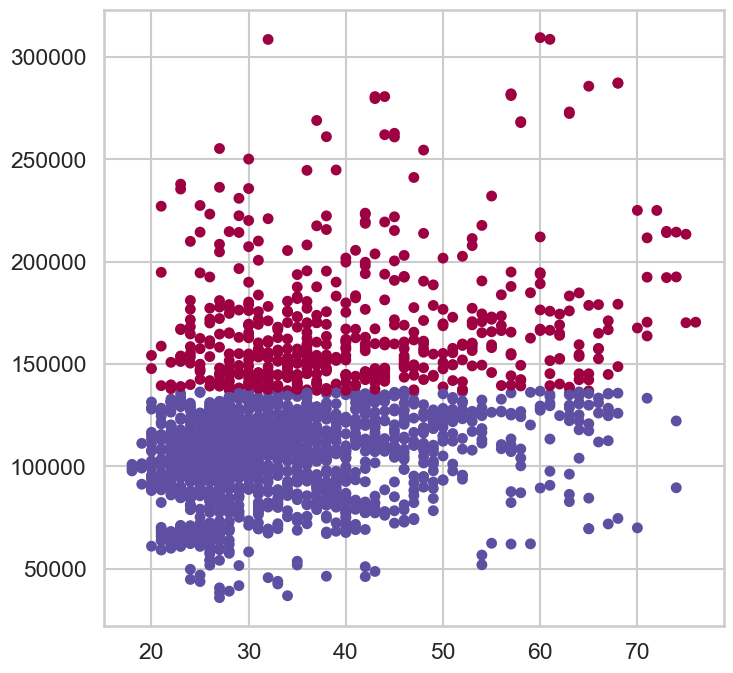

In [132]:
# Apply K-means on the data
k = 2

distance_type = 'Eucledian'
results = GUC_Kmean(data.values, k, distance_type)

# Extract cluster distances and metric
distances = results[0]
metric = results[1]

# Display clusters
cluster_labels = np.argmin(distances, axis=0)
GUC_Plotting(data.values, cluster_labels)

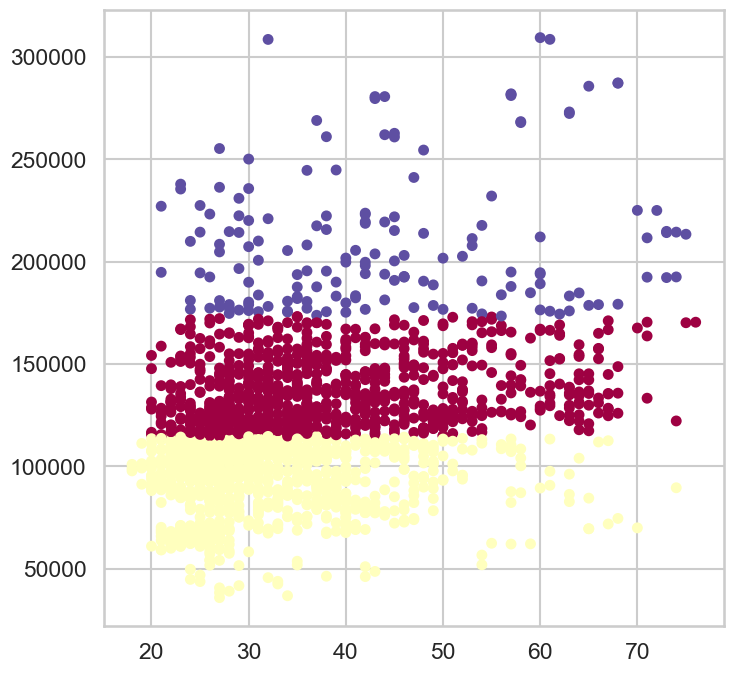

In [133]:
# Apply K-means on the data
k = 3

distance_type = 'Eucledian'
results = GUC_Kmean(data.values, k, distance_type)

# Extract cluster distances and metric
distances = results[0]
metric = results[1]

# Display clusters
cluster_labels = np.argmin(distances, axis=0)
GUC_Plotting(data.values, cluster_labels)

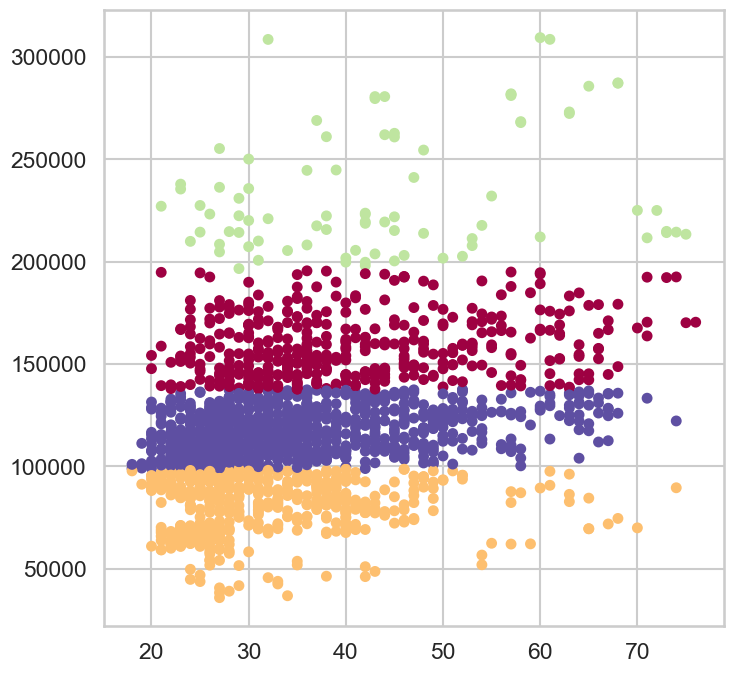

In [134]:
# Apply K-means on the data
k = 4

distance_type = 'Eucledian'
results = GUC_Kmean(data.values, k, distance_type)

# Extract cluster distances and metric
distances = results[0]
metric = results[1]

# Display clusters
cluster_labels = np.argmin(distances, axis=0)
GUC_Plotting(data.values, cluster_labels)

plot the Cluster Metric versus the number of clusters

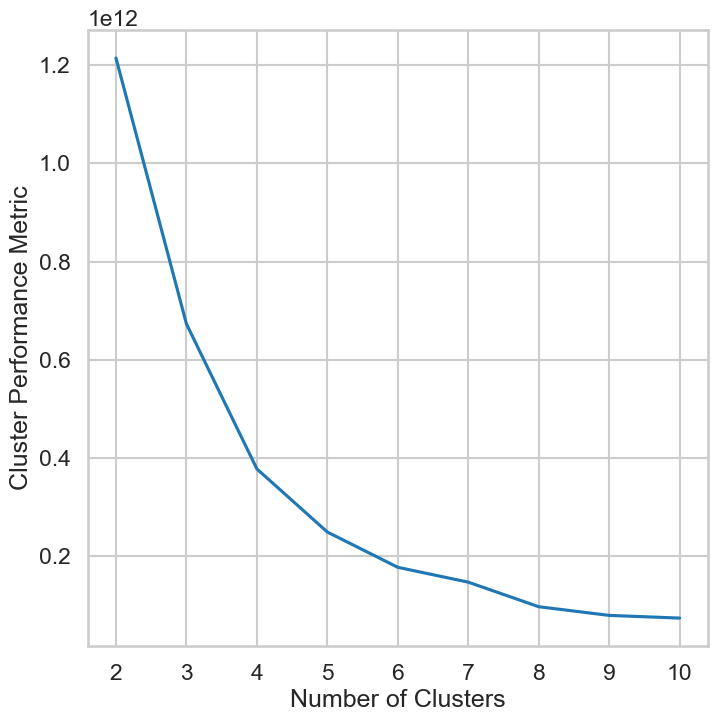

In [88]:
# Set the range of the number of clusters
min_clusters = 2
max_clusters = 10

# Initialize an empty list to store the metric values
metric_values = []

# Loop through the range of the number of clusters and calculate the metric for each cluster
for num_clusters in range(min_clusters, max_clusters+1):
    result = GUC_Kmean(data.values, num_clusters, distance_type)
    metric_values.append(result[1])

# Plot the metric values against the number of clusters
plt.plot(range(min_clusters, max_clusters+1), metric_values)
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Performance Metric')
plt.show()

Pearson

In [137]:
df = pd.read_csv("E://University/Semester 10/Machine Learning (NETW1013)/Assignments/Assignment 1/Customer data.csv", index_col=0)
data = df[['Age', 'Income', 'Settlement size']]
num_clusters = 3
distance_type = 'Pearson'
result = GUC_Kmean(data.values.T, num_clusters, distance_type)

# Create a new boolean index with the same size as the new cluster_labels array
bool_index = np.zeros(len(data), dtype=bool)
for i in range(num_clusters):
    bool_index[cluster_labels == i] = True

# Use the new boolean index to get the data points for each cluster
cluster_data = []
for i in range(num_clusters):
    cluster_data.append(data[bool_index == i])

print("Cluster Distances:\n", result[0])
print("Cluster Metric:", result[1])

Cluster Distances:
 [[ 1.99999999e+00  4.86429285e-08 -2.22044605e-16]
 [ 0.00000000e+00  1.99999999e+00  1.99999999e+00]
 [ 1.99999999e+00 -2.22044605e-16  4.86429285e-08]]
Cluster Metric: 9.860761315262648e-32
